In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('mainset2.csv')

variables = []
for col in df.columns:
    if 'id' in col:
        df[col] = df[col].astype('category')

for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        if 'difference' not in col:
            variables.append(col)
print('Numerical features :\n', variables)        
df.info()

Numerical features :
 ['height', 'seconds', 'fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'to', 'pf', 'pts', 'poss', 'off_rate', 'def_rate', 'net_rate', 'pace', 'ast_pct', 'ast_tov', 'ast_ratio', 'oreb_pct', 'dreb_pct', 'reb_pct', 'tm_tov_pct', 'usg_pct', 'game_score', 'plus_minus']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514704 entries, 0 to 514703
Data columns (total 46 columns):
date              514704 non-null object
season_id         514704 non-null category
location          514704 non-null object
type              514704 non-null object
outcome           514704 non-null object
difference        514704 non-null int64
game_id           514704 non-null category
team_id           514704 non-null category
team_abb          514704 non-null object
team_city         514704 non-null object
player_id         514704 non-null category
name              514704 non-null object
start_position    269063 non-null object
age_days          51470

In [3]:
column_check = ['pct', 'date', 'id', 'pace', 'rating', 'height',
               'tov', 'ratio', 'pie', 'score']

columns_to_adj = []

for col in df.columns:
    if df[col].dtype ==(float or int):
        
        if any(ext in col for ext in column_check):
            print(f'To be ignored for minute adjustment\t: {col}')
        else:
            columns_to_adj.append(col)
    else:
        print(f'Team/Player Data\t\t\t: {col}')
              
columns_to_adj

Team/Player Data			: date
Team/Player Data			: season_id
Team/Player Data			: location
Team/Player Data			: type
Team/Player Data			: outcome
Team/Player Data			: difference
Team/Player Data			: game_id
Team/Player Data			: team_id
Team/Player Data			: team_abb
Team/Player Data			: team_city
Team/Player Data			: player_id
Team/Player Data			: name
Team/Player Data			: start_position
Team/Player Data			: age_days
To be ignored for minute adjustment	: height
Team/Player Data			: seconds
To be ignored for minute adjustment	: pace
To be ignored for minute adjustment	: ast_pct
To be ignored for minute adjustment	: ast_tov
To be ignored for minute adjustment	: ast_ratio
To be ignored for minute adjustment	: oreb_pct
To be ignored for minute adjustment	: dreb_pct
To be ignored for minute adjustment	: reb_pct
To be ignored for minute adjustment	: tm_tov_pct
To be ignored for minute adjustment	: usg_pct
To be ignored for minute adjustment	: game_score


['fgm',
 'fga',
 'fg3m',
 'fg3a',
 'ftm',
 'fta',
 'oreb',
 'dreb',
 'reb',
 'ast',
 'stl',
 'blk',
 'to',
 'pf',
 'pts',
 'poss',
 'off_rate',
 'def_rate',
 'net_rate',
 'plus_minus']

### Non-adjusted time data

,count,mean,std,min,25%,50%,75%,max
difference,514704.0,3.322960,13.585443,-58.0000,-6.0000,4.0000,12.0000,61.0000
height,514704.0,2.004497,0.090919,1.6002,1.9304,2.0066,2.0828,2.3114
seconds,514704.0,1506.540330,621.222666,301.0000,1021.0000,1513.0000,2003.0000,3898.0000
fgm,514704.0,3.880628,3.023453,0.0000,2.0000,3.0000,6.0000,28.0000
fga,514704.0,8.562840,5.618131,0.0000,4.0000,8.0000,12.0000,50.0000
fg3m,514704.0,0.745899,1.189406,0.0000,0.0000,0.0000,1.0000,14.0000
fg3a,514704.0,2.091095,2.476602,0.0000,0.0000,1.0000,3.0000,24.0000
ftm,514704.0,1.904302,2.434191,0.0000,0.0000,1.0000,3.0000,26.0000
fta,514704.0,2.512003,2.987875,0.0000,0.0000,2.0000,4.0000,39.0000
oreb,514704.0,1.153554,1.464058,0.0000,0.0000,1.0000,2.0000,18.0000


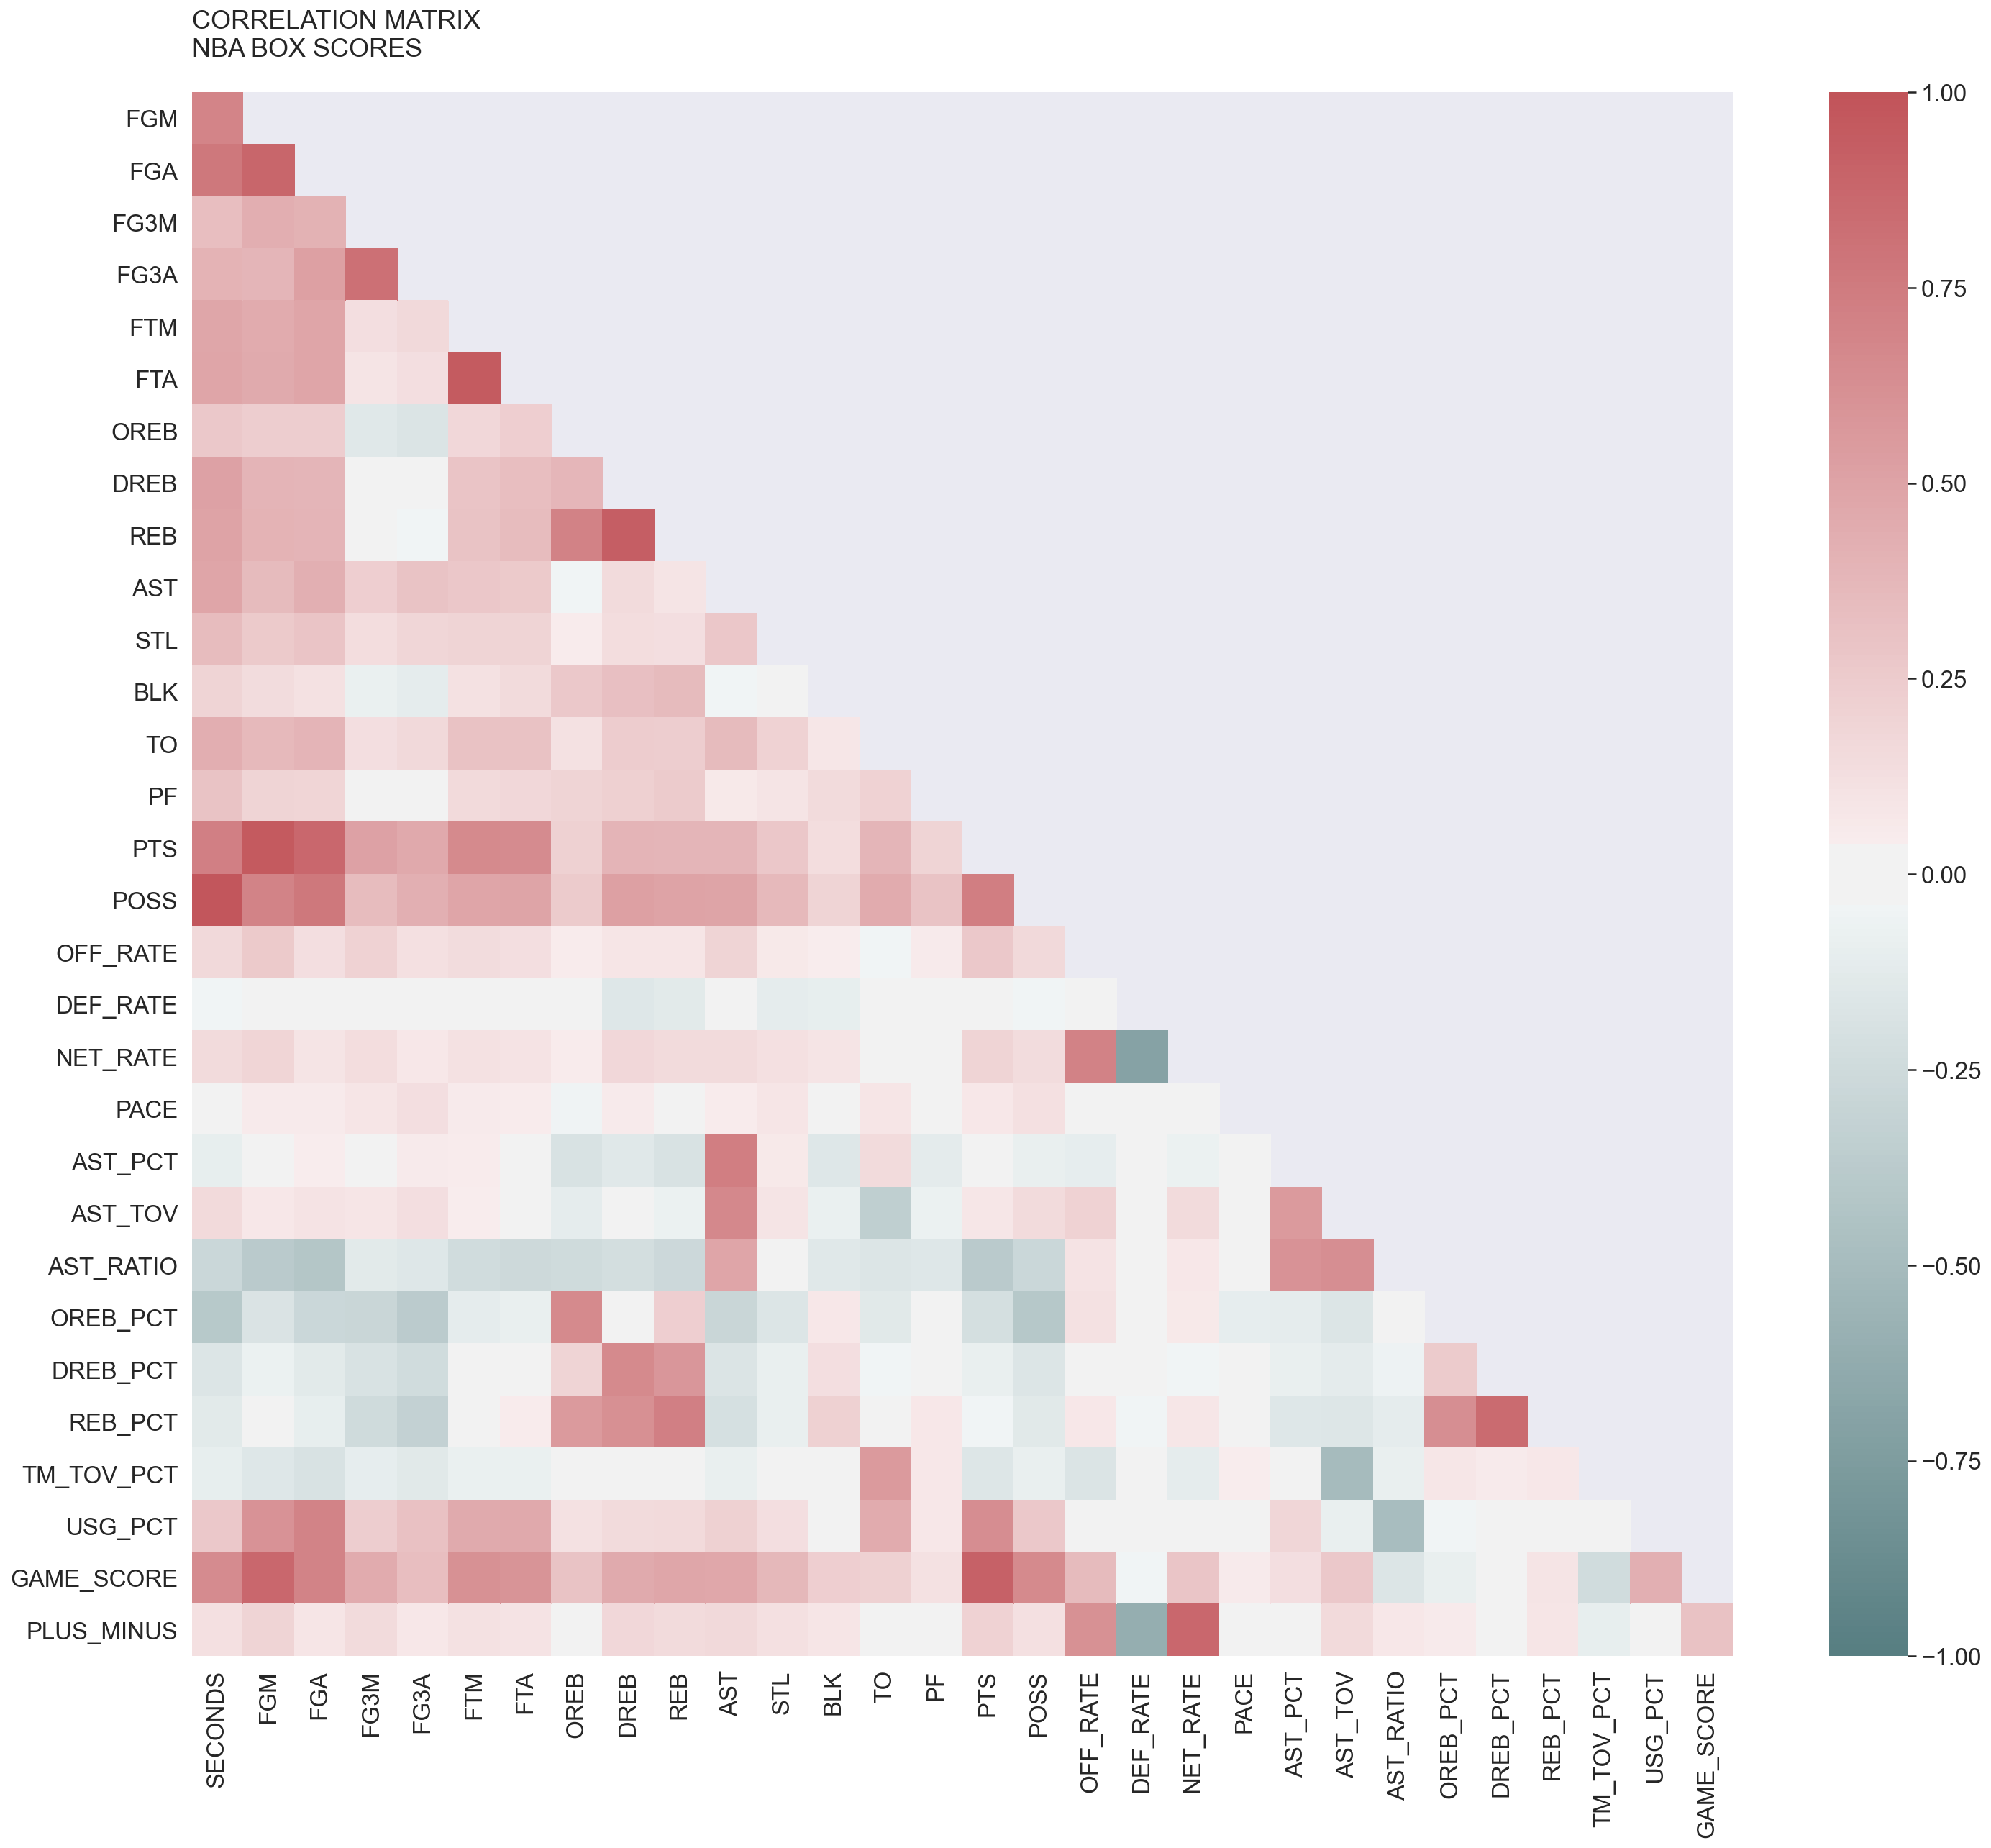

In [4]:
display(df.describe().T)
df_corr = df.loc[:,'seconds':].corr()
fig, ax = plt.subplots(figsize=(24, 20))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(200, 10, 50, n=9, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nNBA BOX SCORES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

### Adjusted data by per 40 min basis

,count,mean,std,min,25%,50%,75%,max
difference,514704.0,3.322960,13.585443,-58.000000,-6.000000,4.000000,12.000000,61.000000
height,514704.0,2.004497,0.090919,1.600200,1.930400,2.006600,2.082800,2.311400
seconds,514704.0,1506.540330,621.222666,301.000000,1021.000000,1513.000000,2003.000000,3898.000000
fgm,514704.0,5.770725,3.613880,0.000000,3.225806,5.565217,8.026756,46.905537
fga,514704.0,13.061560,5.832739,0.000000,9.012876,12.834225,16.794962,52.602740
fg3m,514704.0,1.100637,1.743752,0.000000,0.000000,0.000000,1.889764,26.086957
fg3a,514704.0,3.202257,3.578302,0.000000,0.000000,2.274882,5.408451,39.215686
ftm,514704.0,2.759162,3.316449,0.000000,0.000000,1.883091,4.465116,51.376147
fta,514704.0,3.707767,4.157413,0.000000,0.000000,2.807018,5.925926,67.226891
oreb,514704.0,1.902260,2.475454,0.000000,0.000000,1.176471,2.965404,40.776699


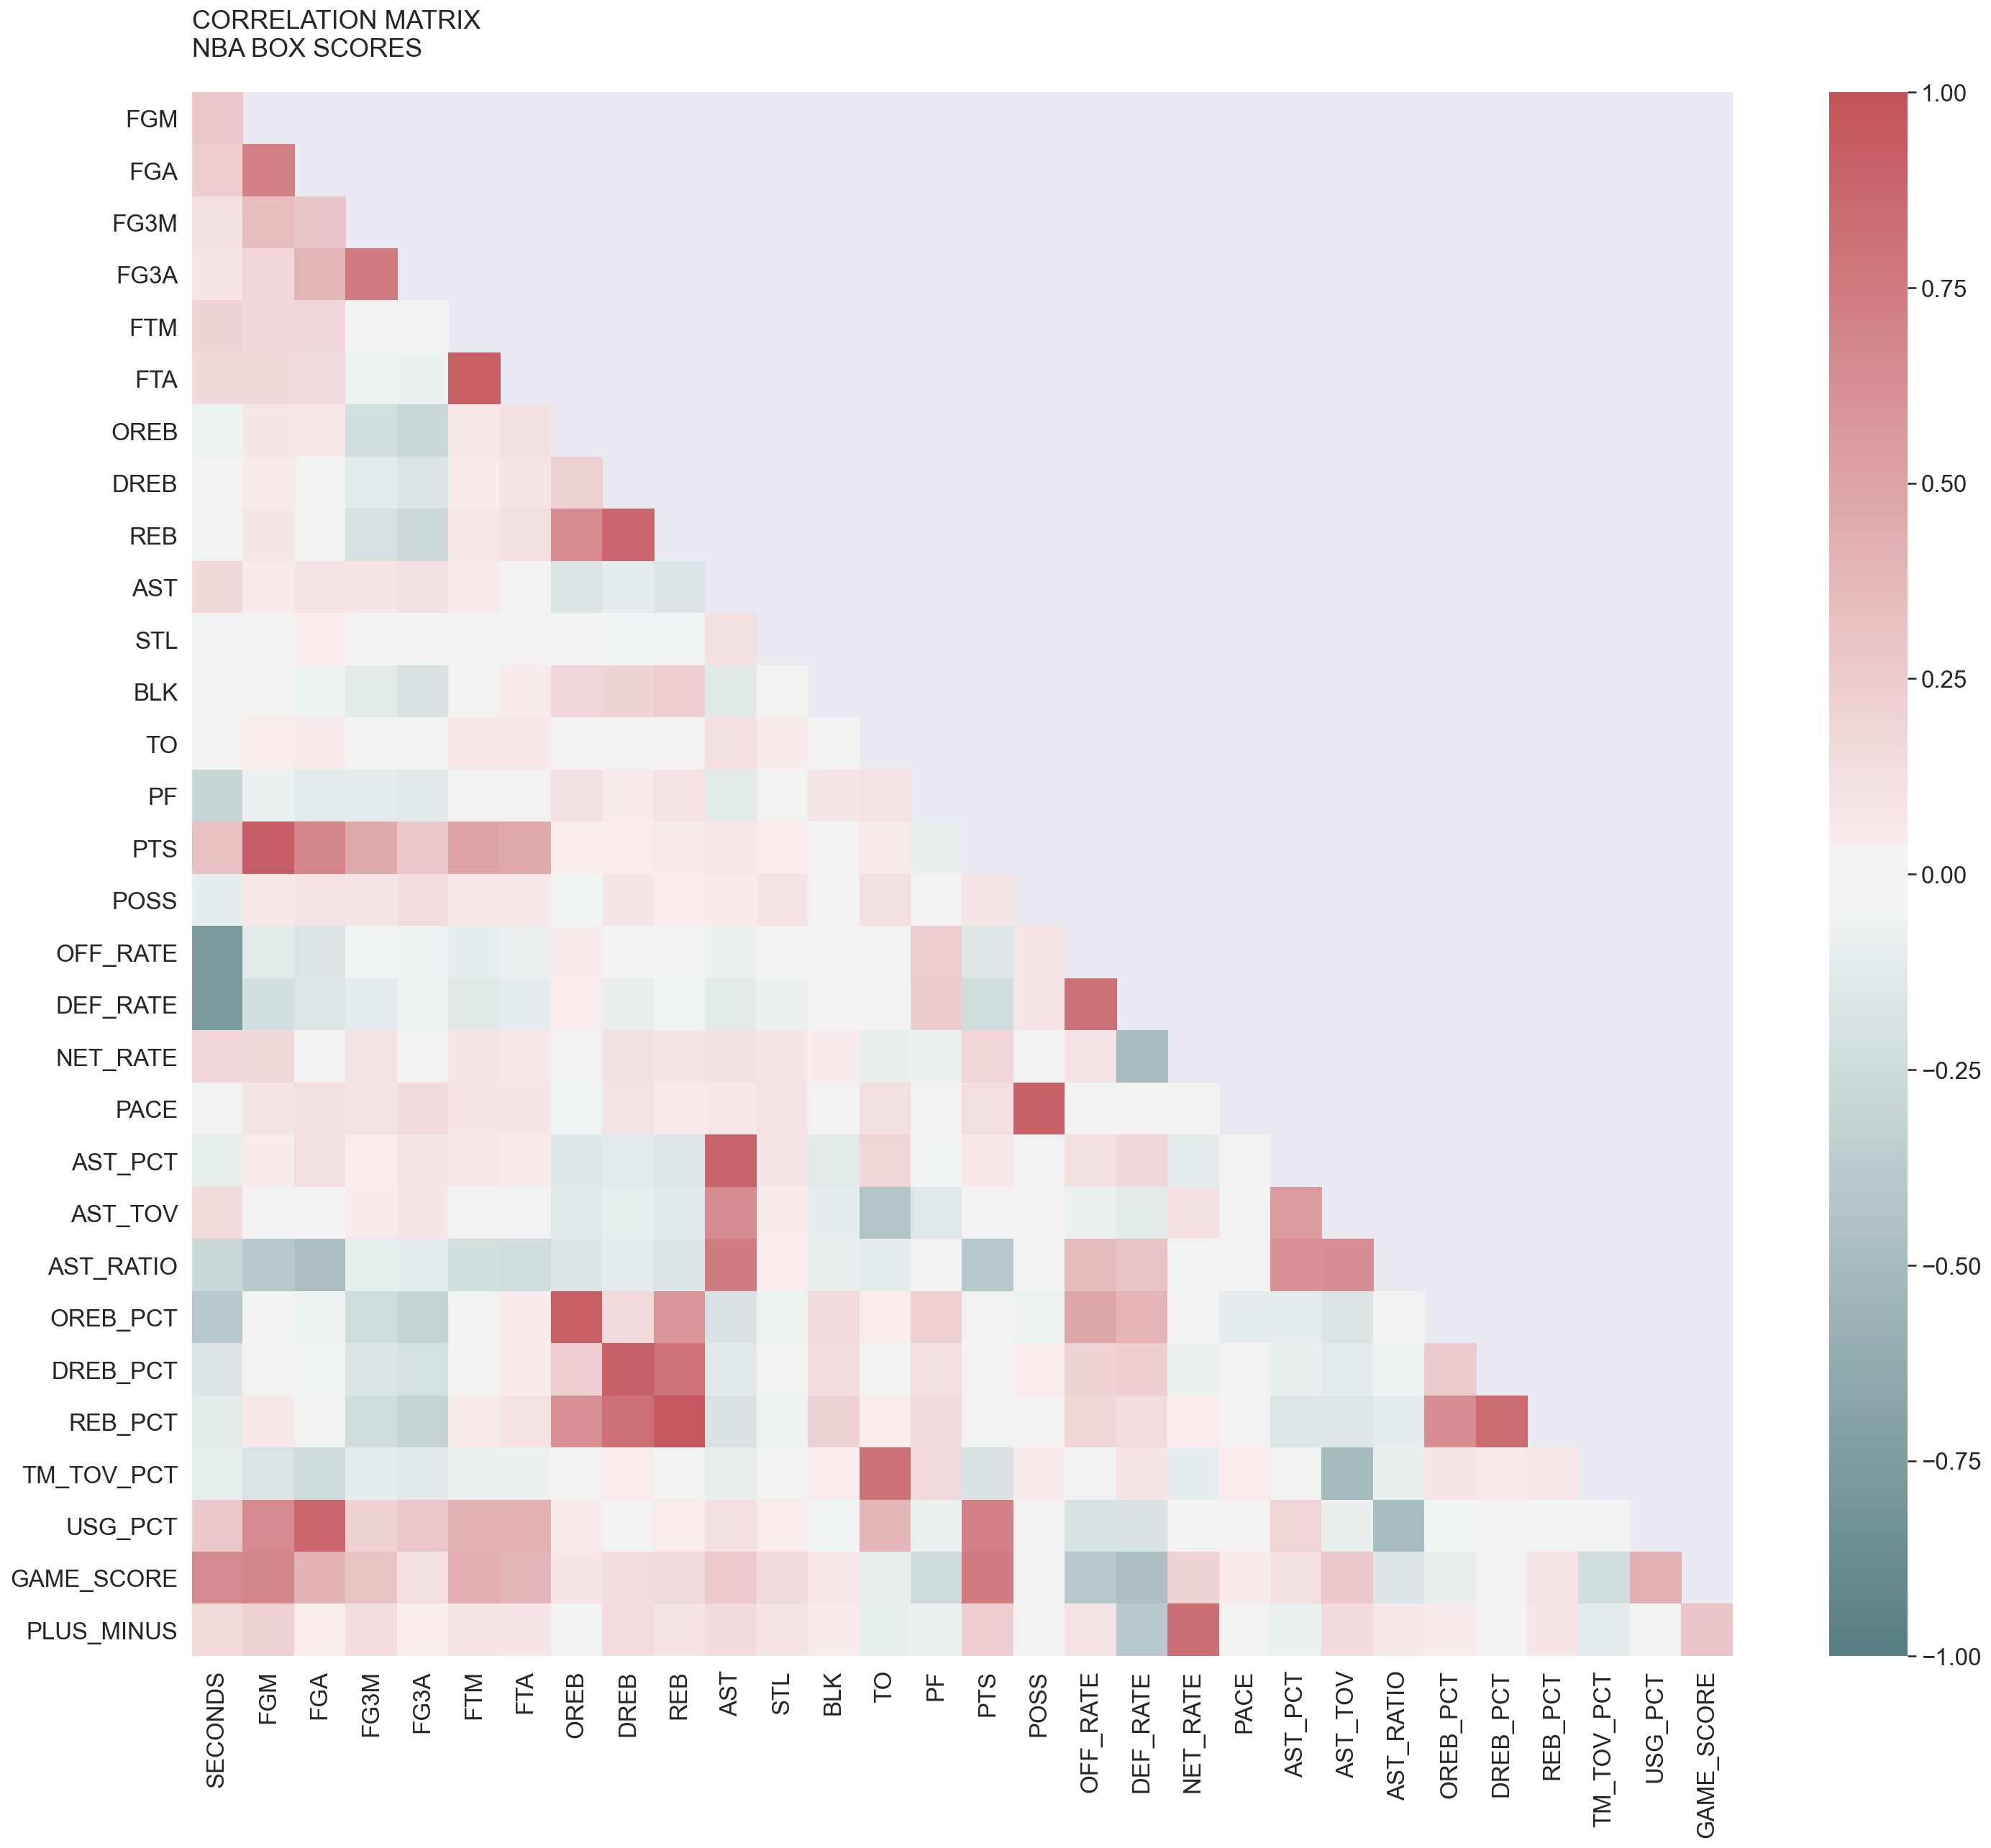

In [5]:
for col in columns_to_adj:
    df[col] = df[col] / (df.seconds / 60) * 40

display(df.describe().T)

df_corr = df.loc[:,'seconds':].corr()
fig, ax = plt.subplots(figsize=(24, 20))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(200, 10, 50, n=9, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nNBA BOX SCORES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [6]:
import pickle
file = open("br_glossary.pickle",'rb')
br_glossary = pickle.load(file)
{s:br_glossary[s] for s in ['AST%','BLK%', 'eFG%','ORB%','DRB%','GmSc','Pace']}

{'AST%': 'Assist Percentage (available since the 1964-65 season in the NBA); the  formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG).  Assist percentage is an estimate of the percentage of teammate field goals  a player assisted while he was on the floor.',
 'BLK%': 'Block Percentage (available since the 1973-74 season in the NBA); the  formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp3PA)).  Block percentage is an estimate of the  percentage of opponent two-point field goal attempts blocked by the player  while he was on the floor.',
 'eFG%': 'Effective Field Goal Percentage; the formula is (FG +  0.5 * 3P) / FGA.  This statistic  adjusts for the fact that a 3-point field goal is worth one more point  than a 2-point field goal. For example, suppose Player A goes 4 for 10  with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player  would have 10 points from field goals, and thus would have the same  effective field goal percentage (50%).',
 'ORB%': 'Offens

In [7]:
df.sort_values(by='date', inplace=True)
print(df[df.player_id==2544].name.unique())
test = df.groupby(
    'player_id').get_group(2544)

test.set_index("date", inplace=True)
test_ewm = test[variables]

test_ewm.columns = ['{}_{}'.format('ewm', col) for col in test_ewm.columns]

all_columns = list(df.columns) + list(test_ewm.columns)

print('TEST :\n')
display(test_ewm.ewm(span=18, min_periods=1).mean().shift().fillna(0))

['LeBron James']
TEST :



,ewm_height,ewm_seconds,ewm_fgm,ewm_fga,ewm_fg3m,ewm_fg3a,ewm_ftm,ewm_fta,ewm_oreb,ewm_dreb,...,ewm_ast_pct,ewm_ast_tov,ewm_ast_ratio,ewm_oreb_pct,ewm_dreb_pct,ewm_reb_pct,ewm_tm_tov_pct,ewm_usg_pct,ewm_game_score,ewm_plus_minus
date,,,,,,,,,,,,,,,,,,,,,
2003-10-29,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-10-30,2.0574,2570.000000,11.206226,18.677043,0.000000,1.867704,0.933852,2.801556,1.867704,3.735409,...,0.360000,4.500000,28.100000,0.050000,0.091000,0.071000,6.300000,0.247000,24.700000,-8.404669
2003-11-01,2.0574,2491.361111,9.477427,17.714111,0.523200,3.497970,2.533785,4.985356,1.928371,6.995941,...,0.332556,2.726667,25.355556,0.048944,0.155389,0.104778,13.530556,0.268111,19.422222,-5.538471
2003-11-05,2.0574,2438.913669,7.097870,15.688804,0.329084,2.579074,2.351529,3.893525,1.212912,5.915970,...,0.294877,2.828078,26.559301,0.048944,0.140033,0.087422,12.035149,0.235791,14.071326,-11.440742
2003-11-07,2.0574,2446.853205,5.873169,14.228128,0.232623,2.393646,1.947524,3.037531,1.427933,6.749355,...,0.284361,3.025032,29.033436,0.045788,0.154093,0.094920,11.438607,0.204489,13.229684,-8.943060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,2.0574,2117.083057,11.166156,21.086957,2.170850,6.201115,5.883417,7.781906,1.345019,10.284485,...,0.436242,2.860653,25.913886,0.045514,0.256687,0.150493,10.628406,0.302716,24.010066,8.014768
2020-10-04,2.0574,2141.495367,11.496451,21.555992,2.264985,6.408755,5.479207,7.500501,1.418535,9.954748,...,0.429796,2.860653,25.891372,0.045323,0.255983,0.147599,9.509627,0.301272,24.703744,7.923948
2020-10-06,2.0574,2163.759012,11.252590,21.004792,2.133931,6.270977,5.546643,7.677266,1.376582,9.873171,...,0.434133,2.624149,25.576491,0.042939,0.256090,0.146273,10.919140,0.301138,23.977034,6.660386


In [8]:
df[df['player_id']==2544][variables].rolling(8,min_periods=1).mean().shift()

,height,seconds,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,...,ast_pct,ast_tov,ast_ratio,oreb_pct,dreb_pct,reb_pct,tm_tov_pct,usg_pct,game_score,plus_minus
91294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91341,2.0574,2570.000,11.206226,18.677043,0.000000,1.867704,0.933852,2.801556,1.867704,3.735409,...,0.360000,4.500000,28.100000,0.050000,0.091000,0.071000,6.300000,0.247000,24.7000,-8.404669
91761,2.0574,2495.500,9.568416,17.764792,0.495663,3.412167,2.449578,4.870419,1.925178,6.824334,...,0.334000,2.820000,25.500000,0.049000,0.152000,0.103000,13.150000,0.267000,19.7000,-5.689323
92141,2.0574,2447.000,7.400221,15.928301,0.330442,2.615203,2.313903,3.927797,1.283452,5.911258,...,0.299667,2.880000,26.533333,0.049000,0.139333,0.088000,11.933333,0.238333,14.8000,-10.941818
92468,2.0574,2451.750,6.280093,14.622625,0.247831,2.448021,1.978736,3.189157,1.449207,6.623225,...,0.289500,3.035000,28.650000,0.046333,0.151500,0.094250,11.450000,0.211000,13.9000,-8.936291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507864,2.0574,2129.250,10.743875,20.858425,1.563135,5.438584,5.621547,7.180985,1.685991,11.103173,...,0.436000,2.857143,26.575000,0.049750,0.283750,0.170875,10.212500,0.297125,23.4125,10.682154
507886,2.0574,2169.750,11.494833,21.532755,1.946277,5.719555,5.580678,7.375111,1.793271,9.923096,...,0.434000,2.958333,26.162500,0.051125,0.263500,0.157000,8.600000,0.300500,25.2500,9.353929
507894,2.0574,2232.875,11.181265,20.650626,1.586761,5.058338,5.046958,6.899205,1.596093,9.609528,...,0.441375,2.833333,26.450000,0.041250,0.261500,0.147375,9.987500,0.286875,24.2125,5.759526
507909,2.0574,2291.000,11.245320,20.940548,1.845493,5.381544,5.855182,7.804349,1.693013,10.094128,...,0.431500,2.388333,23.762500,0.044125,0.273125,0.155125,10.737500,0.301375,25.1250,3.073610


In [9]:
all_ewm_dfs = []
for player in df['player_id'].unique():
    a_box = np.array(
        df[df['player_id']==player])
    b_box = np.array(
        df[df['player_id']==player][variables]. \
        ewm(span=20, min_periods=2).mean().shift())
    ab_box = np.concatenate([a_box, b_box], axis=1)
    all_ewm_dfs.append(ab_box)

concat_array = np.concatenate(all_ewm_dfs, axis=0)

ewm_data = pd.DataFrame(concat_array, columns=all_columns)
a_box = []
b_box = []
all_ewm_dfs = []
concat_array = []
print(ewm_data.shape)
ewm_data.columns

(514704, 78)


Index(['date', 'season_id', 'location', 'type', 'outcome', 'difference',
       'game_id', 'team_id', 'team_abb', 'team_city', 'player_id', 'name',
       'start_position', 'age_days', 'height', 'seconds', 'fgm', 'fga', 'fg3m',
       'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'to',
       'pf', 'pts', 'poss', 'off_rate', 'def_rate', 'net_rate', 'pace',
       'ast_pct', 'ast_tov', 'ast_ratio', 'oreb_pct', 'dreb_pct', 'reb_pct',
       'tm_tov_pct', 'usg_pct', 'game_score', 'plus_minus', 'ewm_height',
       'ewm_seconds', 'ewm_fgm', 'ewm_fga', 'ewm_fg3m', 'ewm_fg3a', 'ewm_ftm',
       'ewm_fta', 'ewm_oreb', 'ewm_dreb', 'ewm_reb', 'ewm_ast', 'ewm_stl',
       'ewm_blk', 'ewm_to', 'ewm_pf', 'ewm_pts', 'ewm_poss', 'ewm_off_rate',
       'ewm_def_rate', 'ewm_net_rate', 'ewm_pace', 'ewm_ast_pct',
       'ewm_ast_tov', 'ewm_ast_ratio', 'ewm_oreb_pct', 'ewm_dreb_pct',
       'ewm_reb_pct', 'ewm_tm_tov_pct', 'ewm_usg_pct', 'ewm_game_score',
       'ewm_plus_minus'],
   

In [10]:
ewm_data.date =pd.to_datetime(ewm_data.date)
for col in ewm_data.loc[:,'height':]:
    ewm_data[col] = ewm_data[col].apply(lambda x: float(x))

/Users/finnalexander/Desktop/Anaconda/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


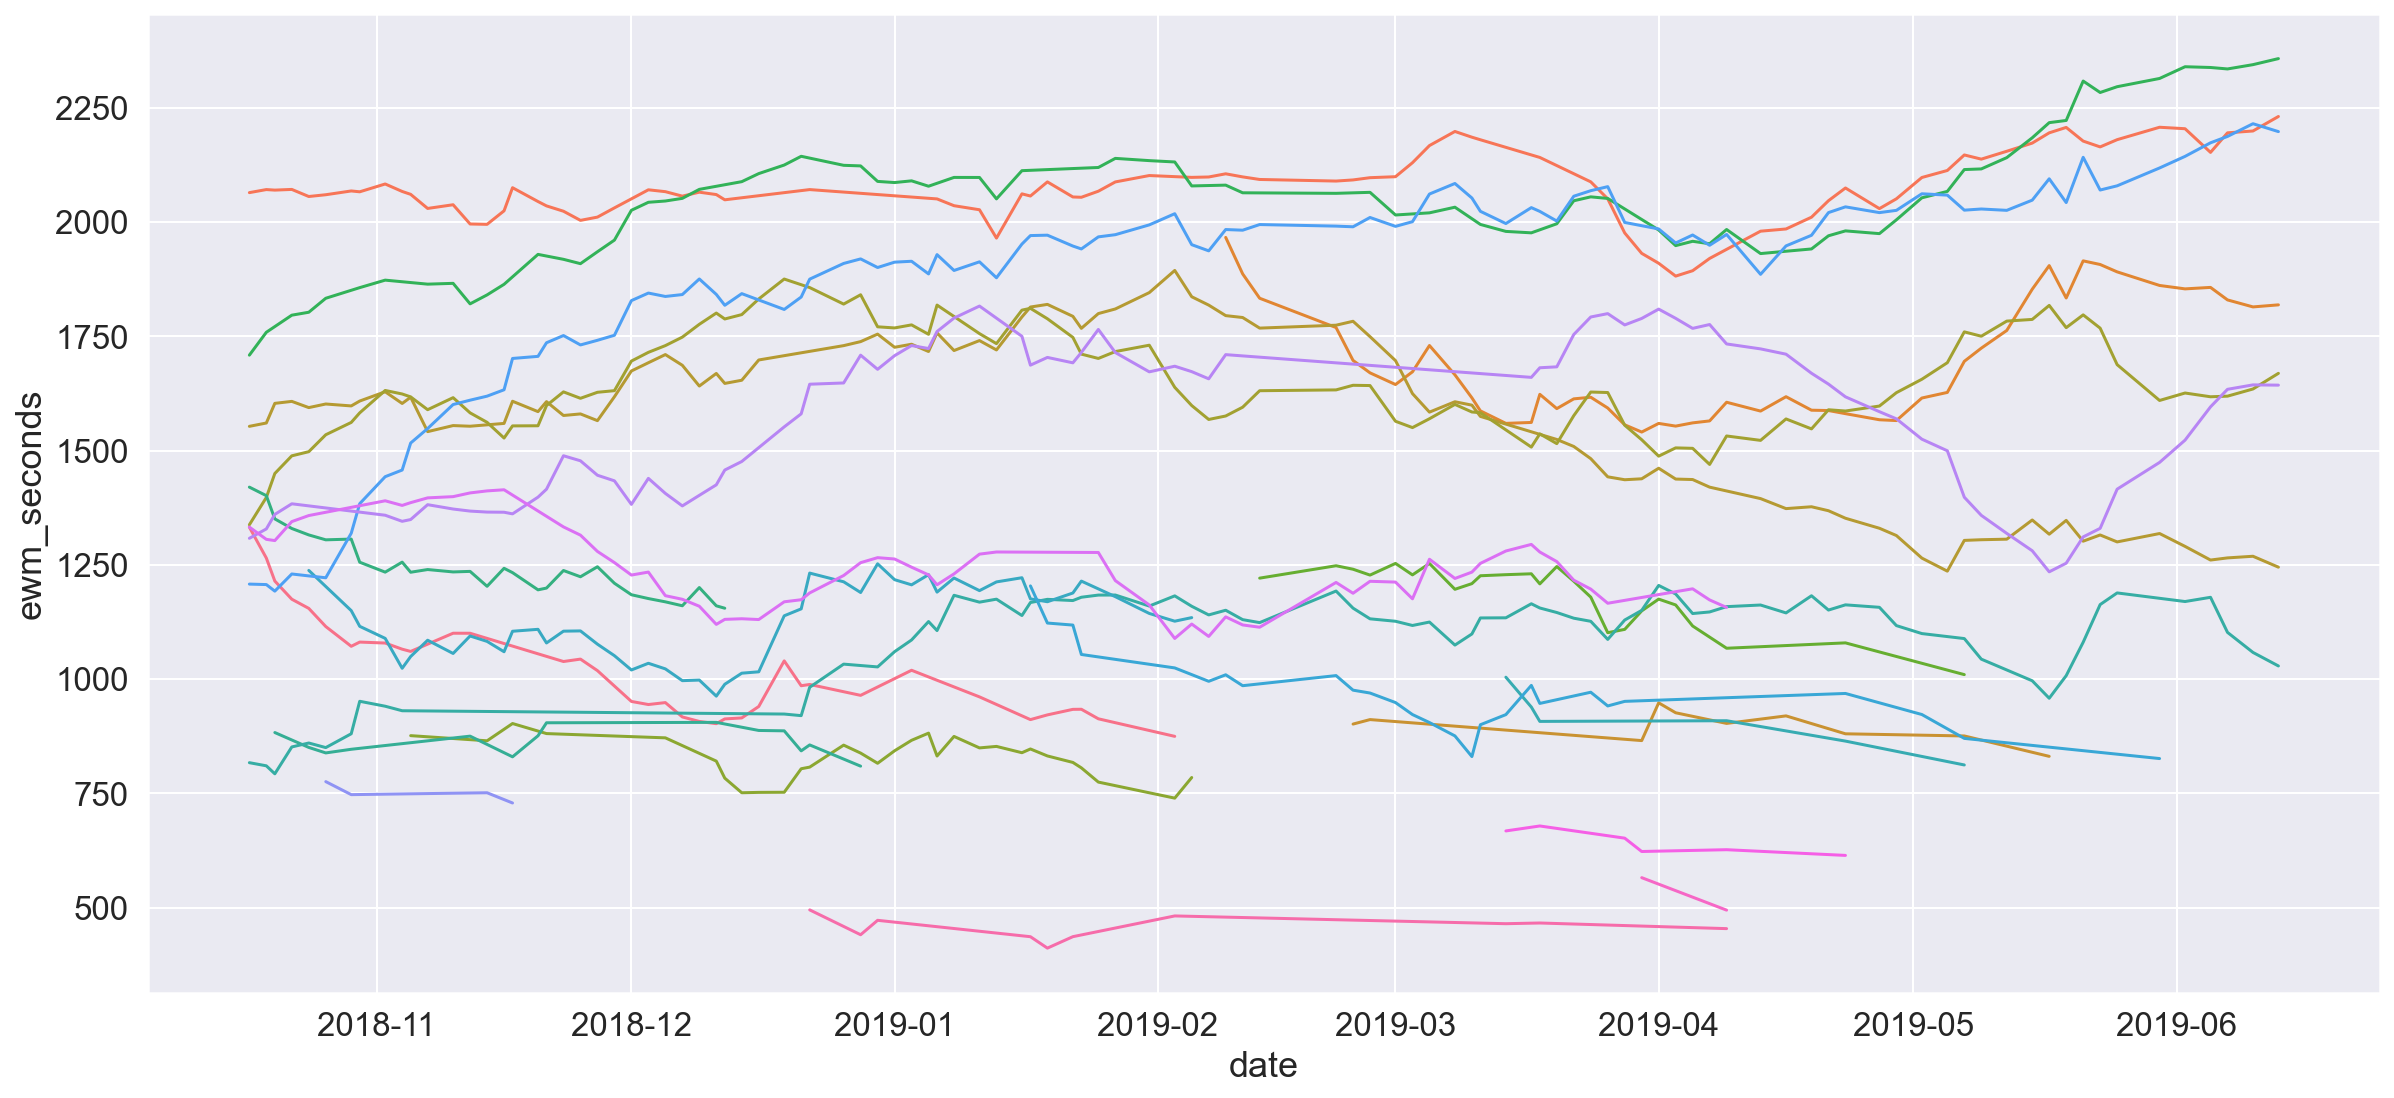

In [11]:
plt.figure(figsize=(20,9))
sns.lineplot(data = ewm_data[(ewm_data['team_abb']=='TOR')&
                             (ewm_data['date']>'2018-09-01')&
                             ((ewm_data['date']<'2019-09-01'))],
             x='date',y='ewm_seconds', err_style='bars', hue='name',
            legend=False);

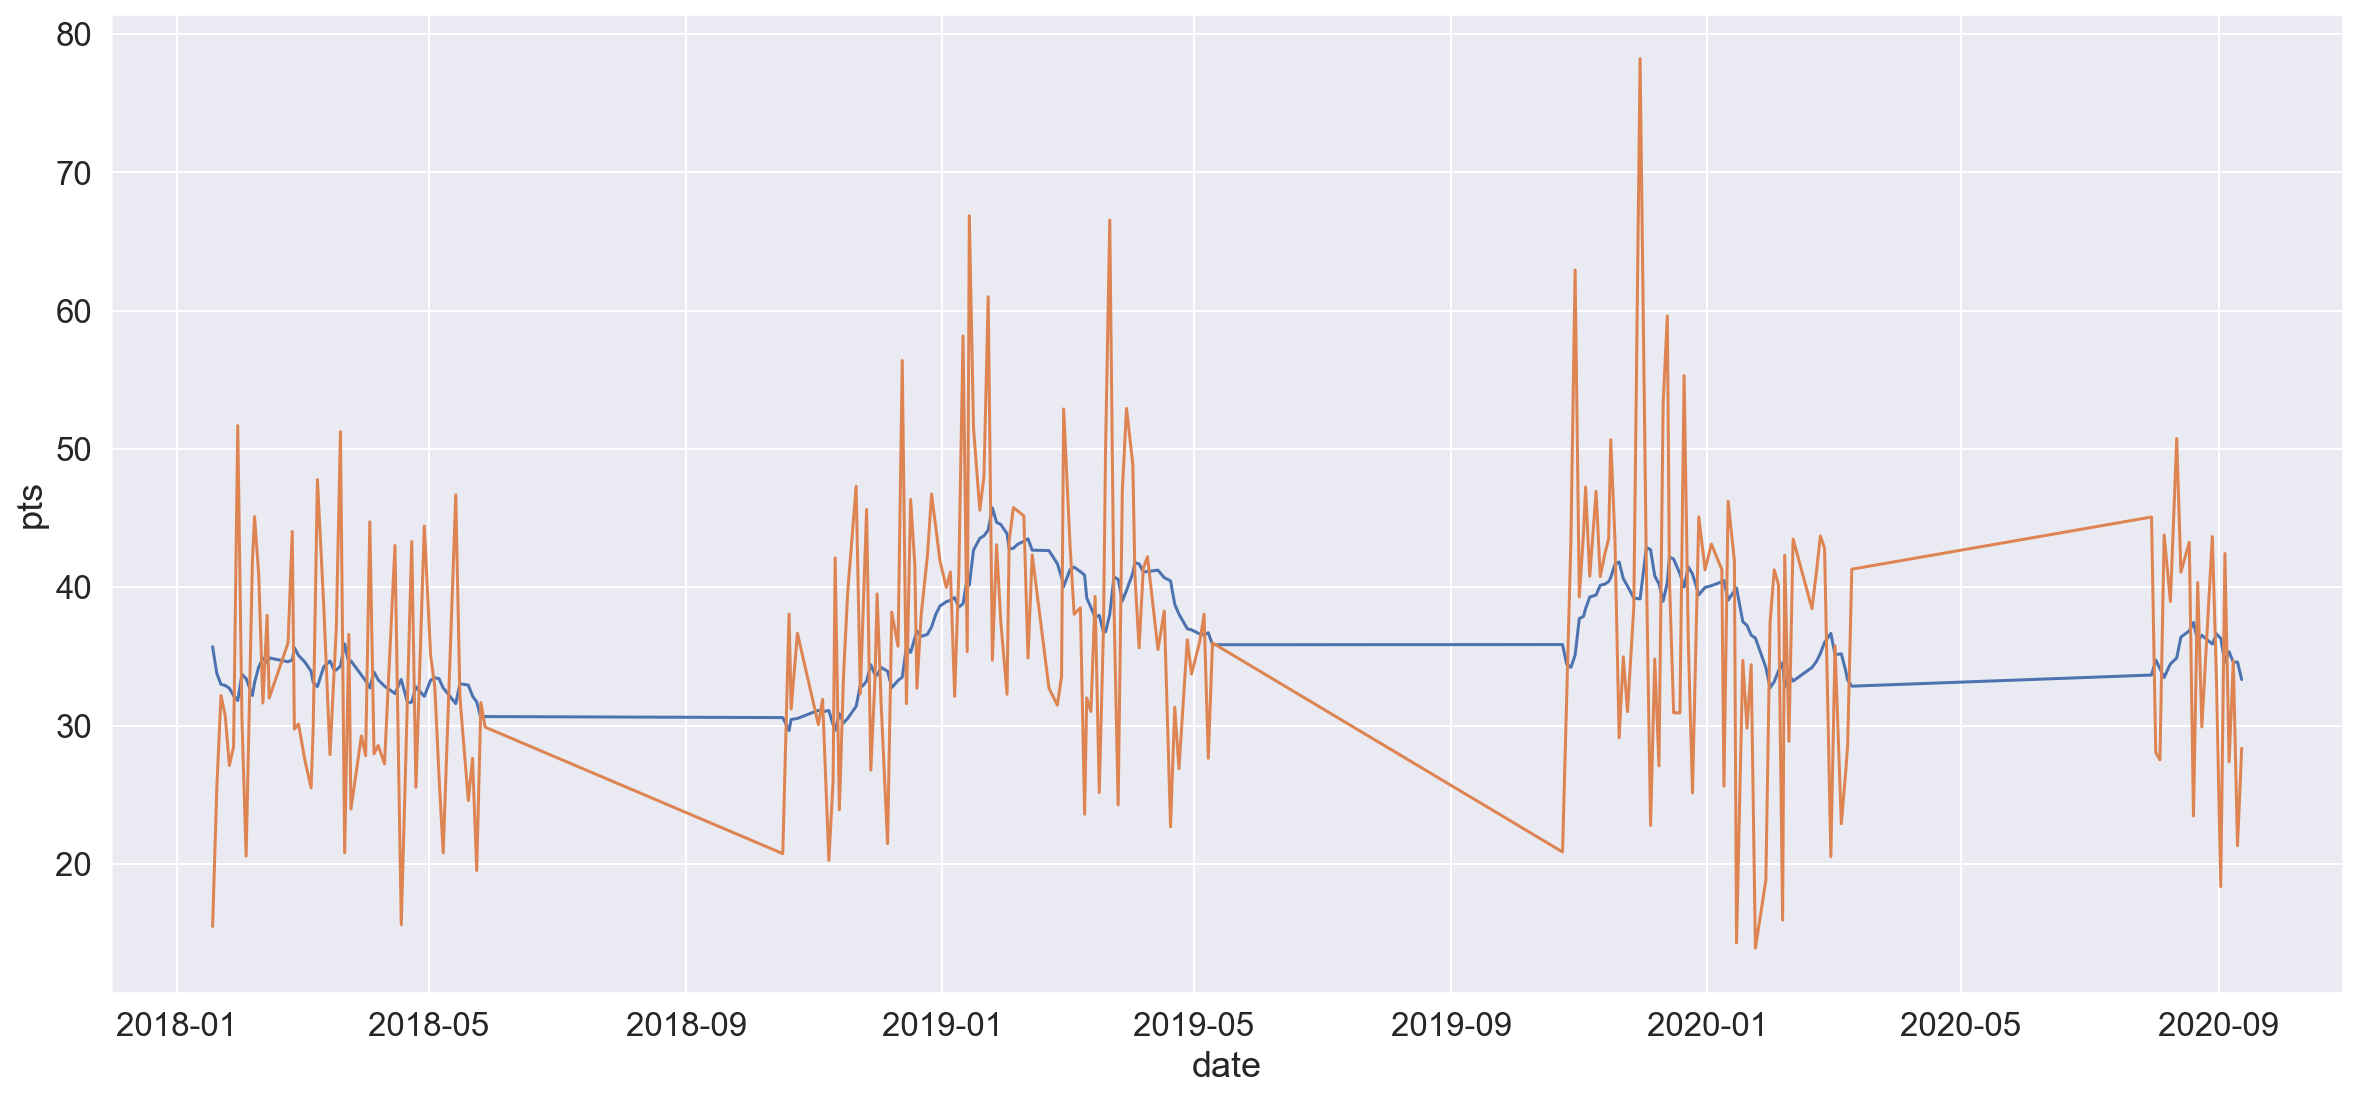

In [12]:
plt.figure(figsize=(20,9))
sns.lineplot(data = ewm_data[(ewm_data['name']=='James Harden')&
                            (ewm_data['date']>'2018-01-01')],
             x='date',y='ewm_pts', err_style='bars')

sns.lineplot(data = ewm_data[(ewm_data['name']=='James Harden')&
                            (ewm_data['date']>'2018-01-01')],
             x='date',y='pts', err_style='bars');

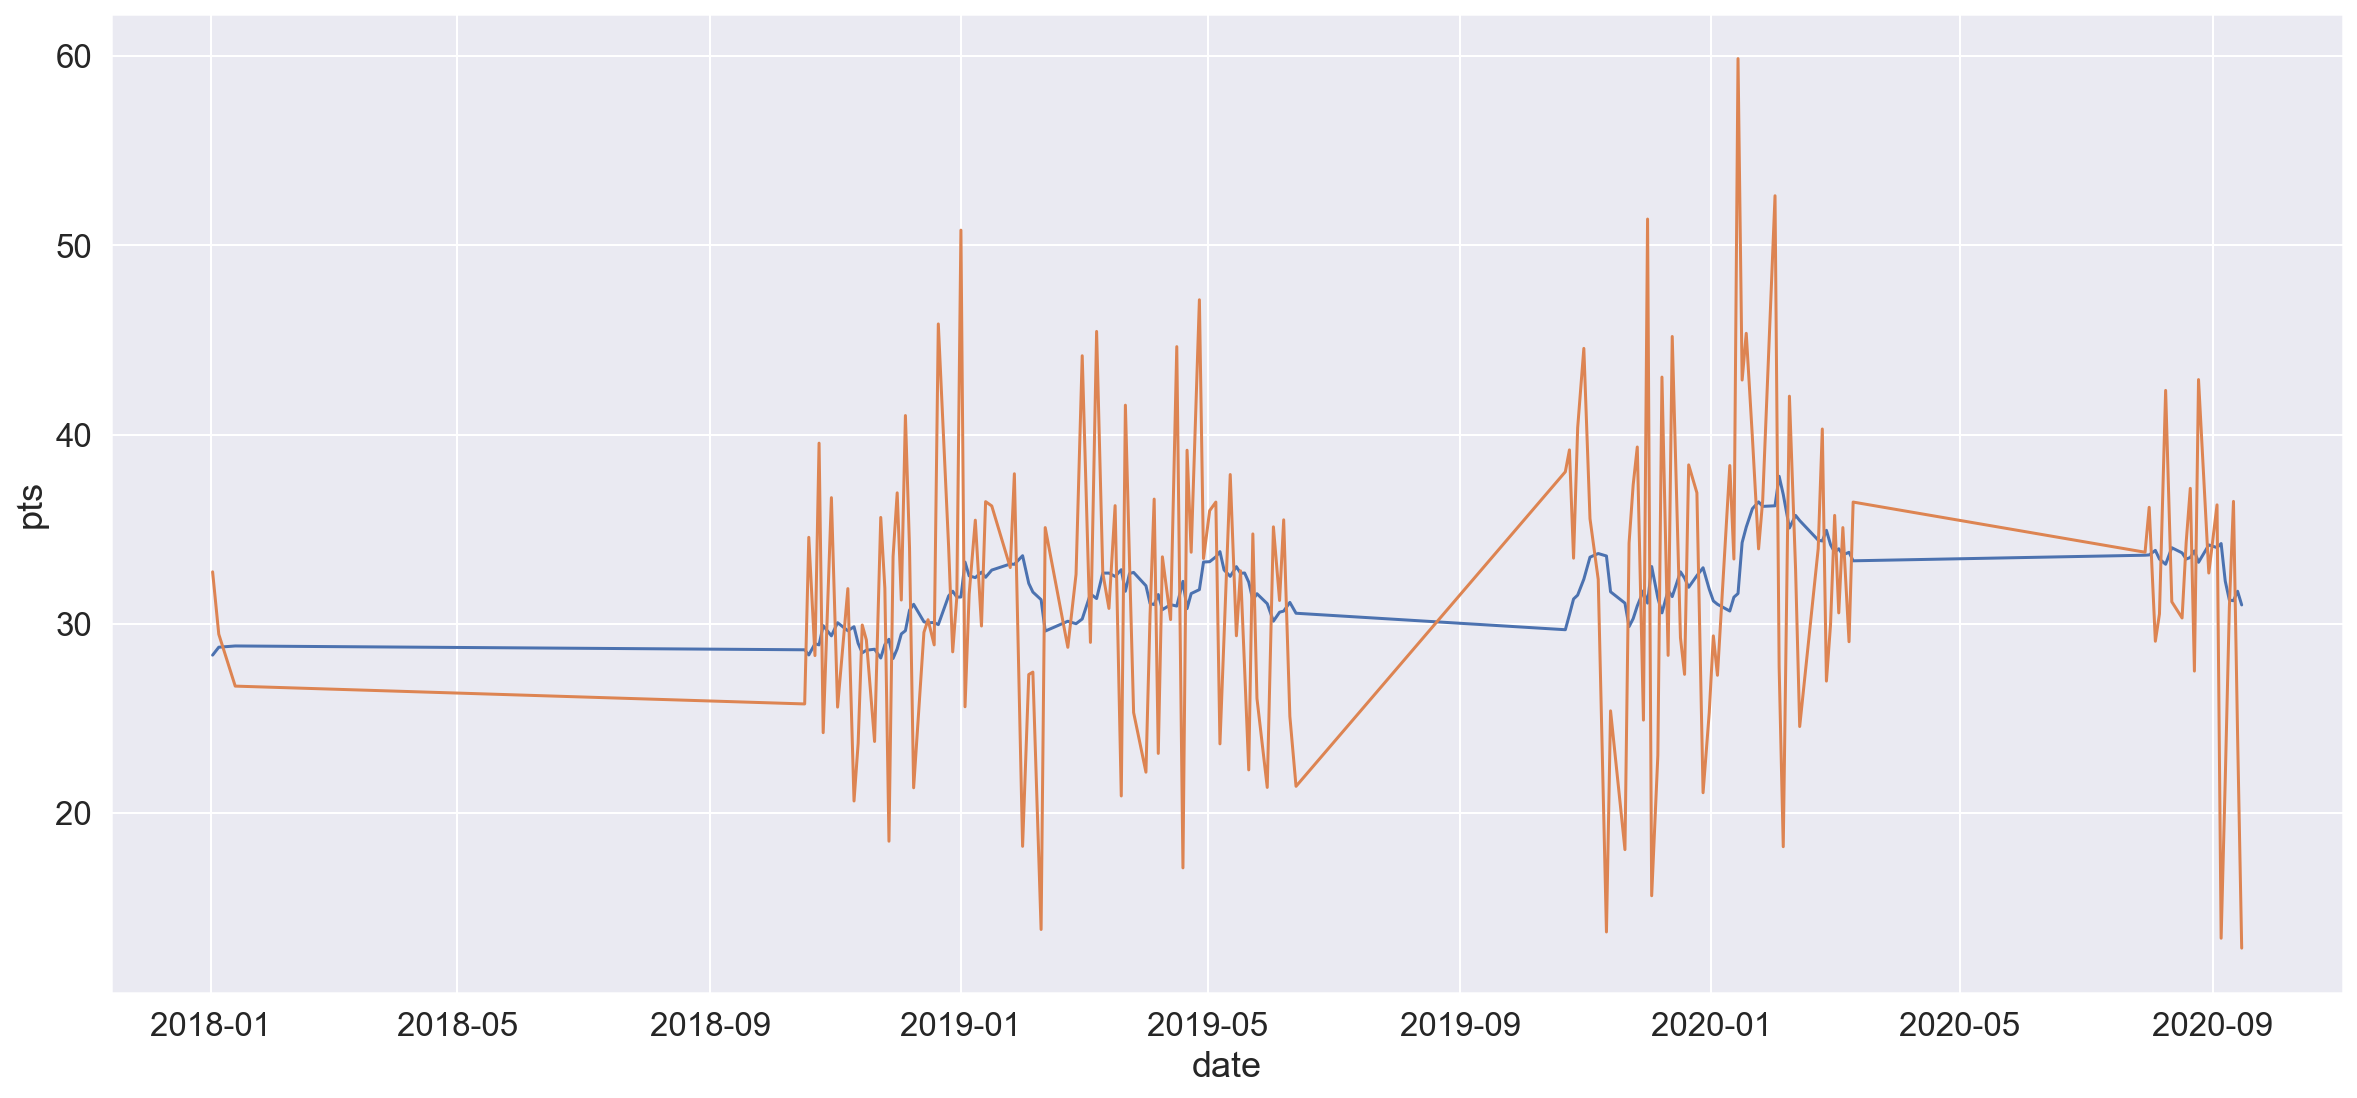

In [13]:
plt.figure(figsize=(20,9))
sns.lineplot(data = ewm_data[(ewm_data['name']=='Kawhi Leonard')&
                            (ewm_data['date']>'2018-01-01')],
             x='date',y='ewm_pts', err_style='bars')

sns.lineplot(data = ewm_data[(ewm_data['name']=='Kawhi Leonard')&
                            (ewm_data['date']>'2018-01-01')],
             x='date',y='pts', err_style='bars');

In [14]:
ewm_data['location'] = pd.get_dummies(ewm_data['location'], drop_first=True)['HOME']
ewm_data['outcome'] = pd.get_dummies(ewm_data['outcome'], drop_first=True)['W']
ewm_data['type'] = pd.get_dummies(ewm_data['type'], drop_first=True)['Regular']

In [15]:
non_shifted = ['seconds', 'fgm', 'fga', 'fg3m',
       'fg3a', 'ftm', 'fta', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'to',
       'pf', 'pts', 'poss', 'off_rate', 'def_rate', 'net_rate', 'pace',
       'ast_pct', 'ast_tov', 'ast_ratio', 'oreb_pct', 'dreb_pct', 'reb_pct',
       'tm_tov_pct', 'usg_pct', 'game_score', 'plus_minus', 'ewm_height']

ewm_data.drop(columns = non_shifted, inplace=True)

grouped_data = ewm_data.groupby(['game_id', 'team_id'])

# 20000011 ['1610612744', '1610612756']

t2 = grouped_data.get_group((20000011, 1610612744)).sort_values(by='ewm_seconds', ascending=False)
t3 = grouped_data.get_group((20000011, 1610612756)).sort_values(by='ewm_seconds', ascending=False)

In [16]:
a = np.vstack((np.array(t2[t2['start_position']=='G'].sort_values(by='height', ascending=False)),
         np.array(t2[t2['start_position']=='F'].sort_values(by='height', ascending=False)),
          np.array(t2[t2['start_position']=='C']),
          np.array(t2[t2['start_position'].isin(
              ['G','F','C'])==False].sort_values(
              by='ewm_seconds', ascending=False).iloc[:3,:].sort_values(
          by='height')))).ravel()

b = np.vstack((np.array(t3[t3['start_position']=='G'].sort_values(by='height', ascending=False)),
         np.array(t3[t3['start_position']=='F'].sort_values(by='height', ascending=False)),
          np.array(t3[t3['start_position']=='C']),
          np.array(t3[t3['start_position'].isin(
              ['G','F','C'])==False].sort_values(
              by='ewm_seconds', ascending=False).iloc[:3,:].sort_values(
          by='height')))).ravel()

game_test_columns = np.array(
    [['{}_{}'.format(i, col) for col in t2.columns] for i in [
        'pg', 'sg', 'sf', 'pf', 'c_', 's1', 's2', 's3']]).ravel()

game_test = pd.DataFrame(np.vstack(
    (a,b)), columns=game_test_columns)

In [17]:
def team_ravel(df): 
    return np.vstack((np.array(df[df['start_position']=='G'].sort_values(by='height', ascending=False)),
         np.array(df[df['start_position']=='F'].sort_values(by='height', ascending=False)),
          np.array(df[df['start_position']=='C']),
          np.array(df[df['start_position'].isin(
              ['G','F','C'])==False].sort_values(
              by='ewm_seconds', ascending=False).iloc[:3,:].sort_values(
          by='height')))).ravel()

In [18]:
remove = ['date', 'season_id', 'location', 'type', 'outcome','difference',
          'game_id', 'team_id', 'team_abb','team_city','start_position']

necessary_drop = [col for col in game_test.loc[:,'pg_name':].columns if \
                  any(n in col for n in remove)]

game_test.drop(columns=necessary_drop, inplace=True)

end_game = np.array([['{}{}'.format(ha, col) for col in game_test.columns] \
                    for ha in ['h_','a_']]).ravel()

In [19]:
game_keys = {}
for gameid, teamid in grouped_data.groups.keys():
    game_keys[gameid] = []
for gameid, teamid in grouped_data.groups.keys():
    game_keys[gameid].append(teamid)

In [20]:
from tqdm import tqdm

all_rows = np.array([])
reversed_rows = np.array([])
c=0
e=0
errors = {}
for game in tqdm(list(game_keys.keys())):
    if game == 0:
        continue
    try:
        a = grouped_data.get_group((game, game_keys[game][0]))
        b = grouped_data.get_group((game, game_keys[game][1]))
        a = team_ravel(a)
        b = team_ravel(b)
        game_df = pd.DataFrame(np.vstack(
            (a,b)), columns=game_test_columns)
        c+=1
    except:
        errors[game] = game_keys[game]
        e+=1
        continue
#         print(f'Total errors: {e}')
    
    remove = ['date', 'season_id', 'location', 'type', 'outcome','difference',
          'game_id', 'team_id', 'team_abb','team_city','start_position']

    necessary_drop = [col for col in game_df.loc[:,'pg_name':].columns if \
                  any(n in col for n in remove)]
    
    game_df.drop(columns=necessary_drop, inplace=True)
    game_df.pg_location = game_df.pg_location.apply(lambda x: int(x))
    
    row = np.array(
        game_df.sort_values(by='pg_location',
                            ascending=False)).ravel()
    reversed_row = np.array(
        game_df.sort_values(by='pg_location')).ravel()
    
    try:
        if all_rows.size == 0:
            all_rows = np.vstack([row])
            reversed_rows = np.vstack([reversed_row])
        else:
            all_rows = np.vstack([all_rows, row])
            reversed_rows = np.vstack(
                [reversed_rows, reversed_row])
    except:
#         print('\n===ERROR!!!===\n', game, bi_keys[game], '\n===!!!!!!!!===\n')
        pass

structured_df = pd.DataFrame(all_rows,
                             columns=end_game)
reversed_df = pd.DataFrame(reversed_rows,
                           columns=end_game)
display(structured_df.head())
display(reversed_df.head())

print(f'TOTAL ERRORS  : {e}')
print(f'ERROR PERCENT : {(e/(e+c) * 100):0f}%')

100%|██████████| 26936/26936 [1:36:35<00:00,  4.65it/s]


,h_pg_date,h_pg_season_id,h_pg_location,h_pg_type,h_pg_outcome,h_pg_difference,h_pg_game_id,h_pg_team_id,h_pg_team_abb,h_pg_team_city,...,a_s3_ewm_ast_pct,a_s3_ewm_ast_tov,a_s3_ewm_ast_ratio,a_s3_ewm_oreb_pct,a_s3_ewm_dreb_pct,a_s3_ewm_reb_pct,a_s3_ewm_tm_tov_pct,a_s3_ewm_usg_pct,a_s3_ewm_game_score,a_s3_ewm_plus_minus
0,2000-10-31,22000,1,1,0,-29,20000001,1610612752,NYK,New York,...,0.201891,2.20081,19.0197,0.0524007,0.126186,0.0713401,10.4397,0.209784,7.42763,0.395078
1,2000-10-31,22000,1,1,0,-4,20000002,1610612751,NJN,New Jersey,...,0.130118,1.20741,18.7017,0.0780839,0.142561,0.0847589,15.527,0.167742,3.37257,-0.942667
2,2000-10-31,22000,1,1,1,11,20000003,1610612753,ORL,Orlando,...,0.126233,1.68216,19.1299,0.0859794,0.189578,0.12317,9.13974,0.135463,6.16359,-9.72846
3,2000-10-31,22000,1,1,0,-24,20000004,1610612737,ATL,Atlanta,...,0.136221,0.859614,16.592,0.0875865,0.151584,0.102845,18.8597,0.178683,2.03583,-8.84928
4,2000-10-31,22000,1,1,0,-9,20000005,1610612761,TOR,Toronto,...,0.1818,1.12097,15.8619,0.160953,0.160534,0.134113,12.5441,0.196542,6.27915,6.12838


,h_pg_date,h_pg_season_id,h_pg_location,h_pg_type,h_pg_outcome,h_pg_difference,h_pg_game_id,h_pg_team_id,h_pg_team_abb,h_pg_team_city,...,a_s3_ewm_ast_pct,a_s3_ewm_ast_tov,a_s3_ewm_ast_ratio,a_s3_ewm_oreb_pct,a_s3_ewm_dreb_pct,a_s3_ewm_reb_pct,a_s3_ewm_tm_tov_pct,a_s3_ewm_usg_pct,a_s3_ewm_game_score,a_s3_ewm_plus_minus
0,2000-10-31,22000,0,1,1,-29,20000001,1610612755,PHI,Philadelphia,...,0.105296,1.70063,14.7471,0.043428,0.105044,0.058004,10.4887,0.175137,7.56453,-3.29029
1,2000-10-31,22000,0,1,1,-4,20000002,1610612739,CLE,Cleveland,...,0.138172,1.25212,45.6454,0.129972,0.171902,0.126692,12.4058,0.0872607,3.20378,-8.95618
2,2000-10-31,22000,0,1,0,11,20000003,1610612764,WAS,Washington,...,0.103516,0.863208,13.5972,0.0640666,0.126341,0.0737039,10.5788,0.175435,3.84133,-0.622713
3,2000-10-31,22000,0,1,1,-24,20000004,1610612766,CHH,Charlotte,...,0.170401,1.10453,18.4639,0.100872,0.14486,0.0889989,11.7286,0.205565,3.54849,-9.85751
4,2000-10-31,22000,0,1,1,-9,20000005,1610612765,DET,Detroit,...,0.087567,0.965228,10.5811,0.0898412,0.197949,0.137849,10.3478,0.207267,5.79679,-3.25842


TOTAL ERRORS  : 1439
ERROR PERCENT : 5.342293%


In [21]:
structured_df.shape, reversed_df.shape

((25497, 580), (25497, 580))

In [21]:
structured_df.to_csv('home_structured_ewm20.csv', index=False)
reversed_df.to_csv('away_structured_ewm20.csv', index=False)

In [23]:
reversed_df.shape[0]*reversed_df.shape[1]

14788260

In [ ]:
pd.read_csv('')